In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 98.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 103.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 25.1
[notice] To update, run: python -m pip install --upgrade pip


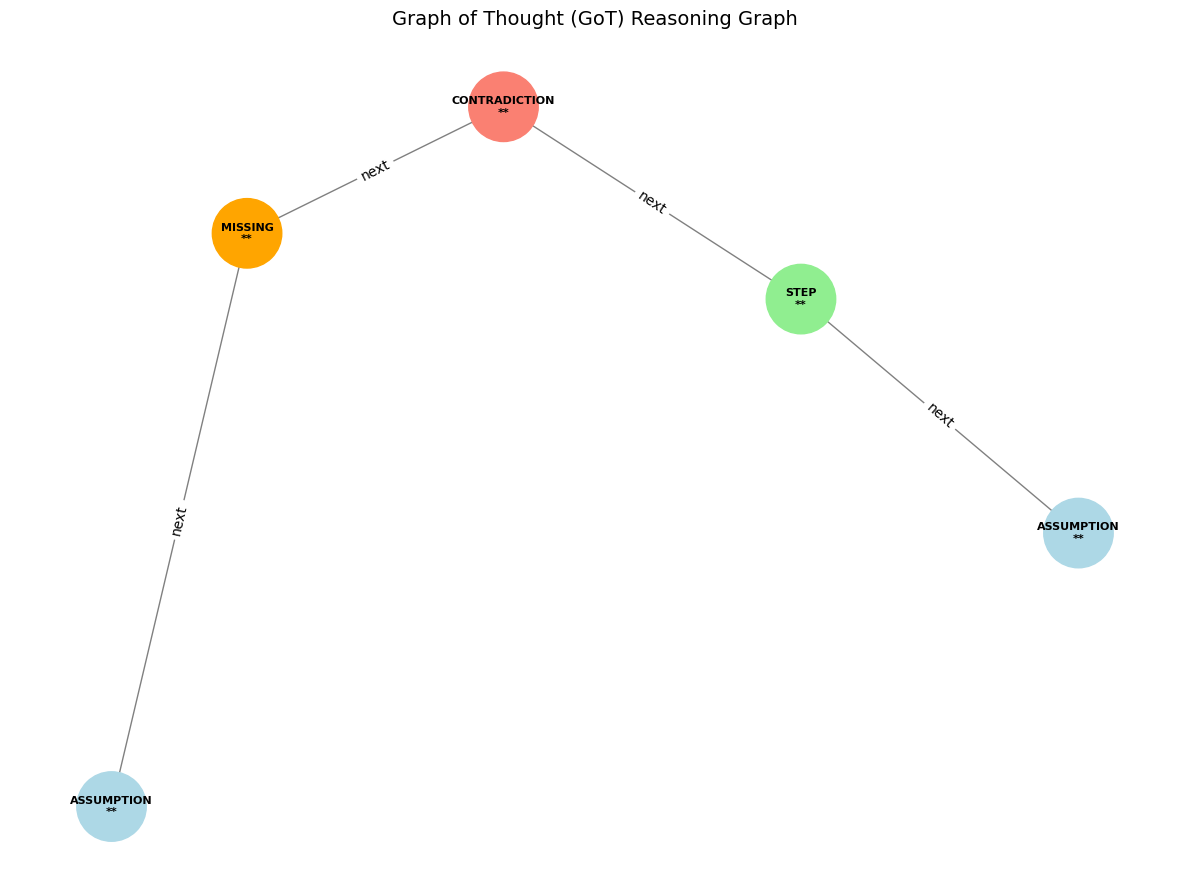

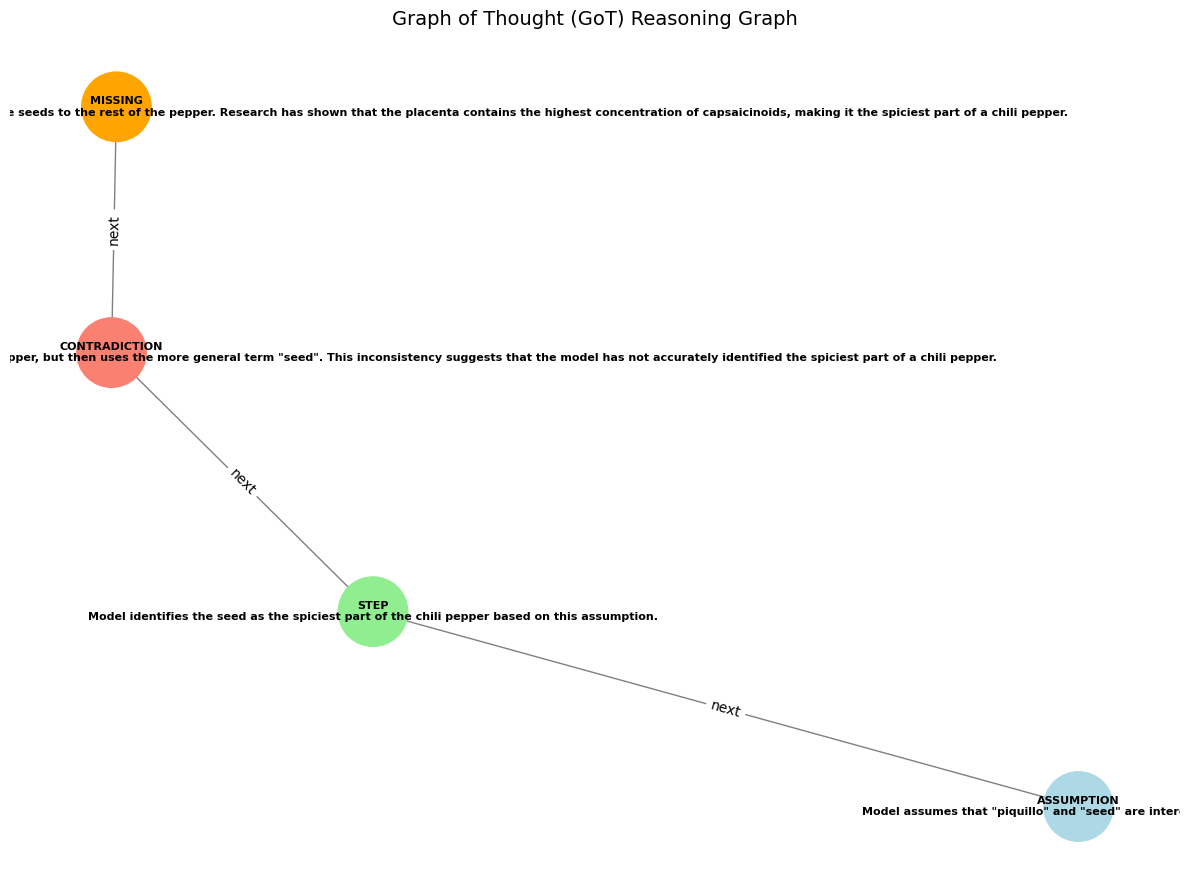

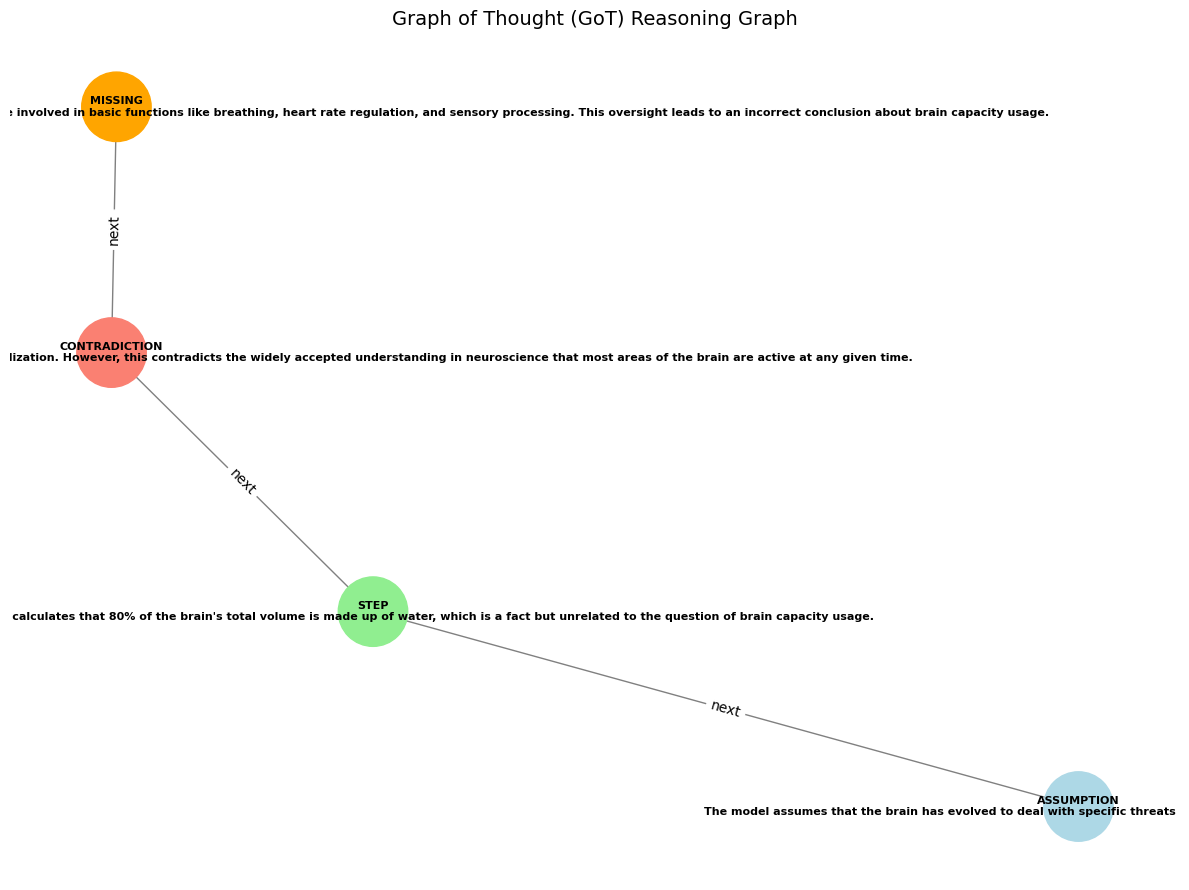

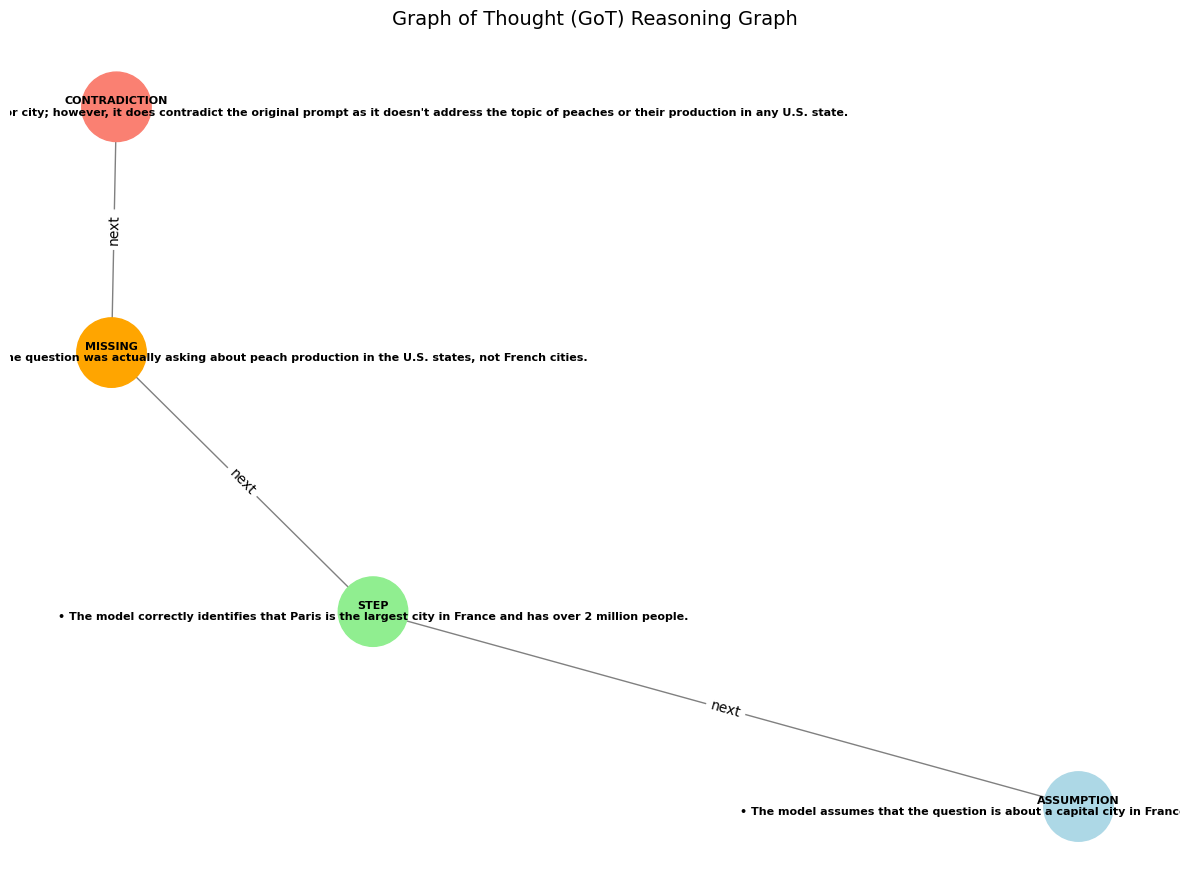

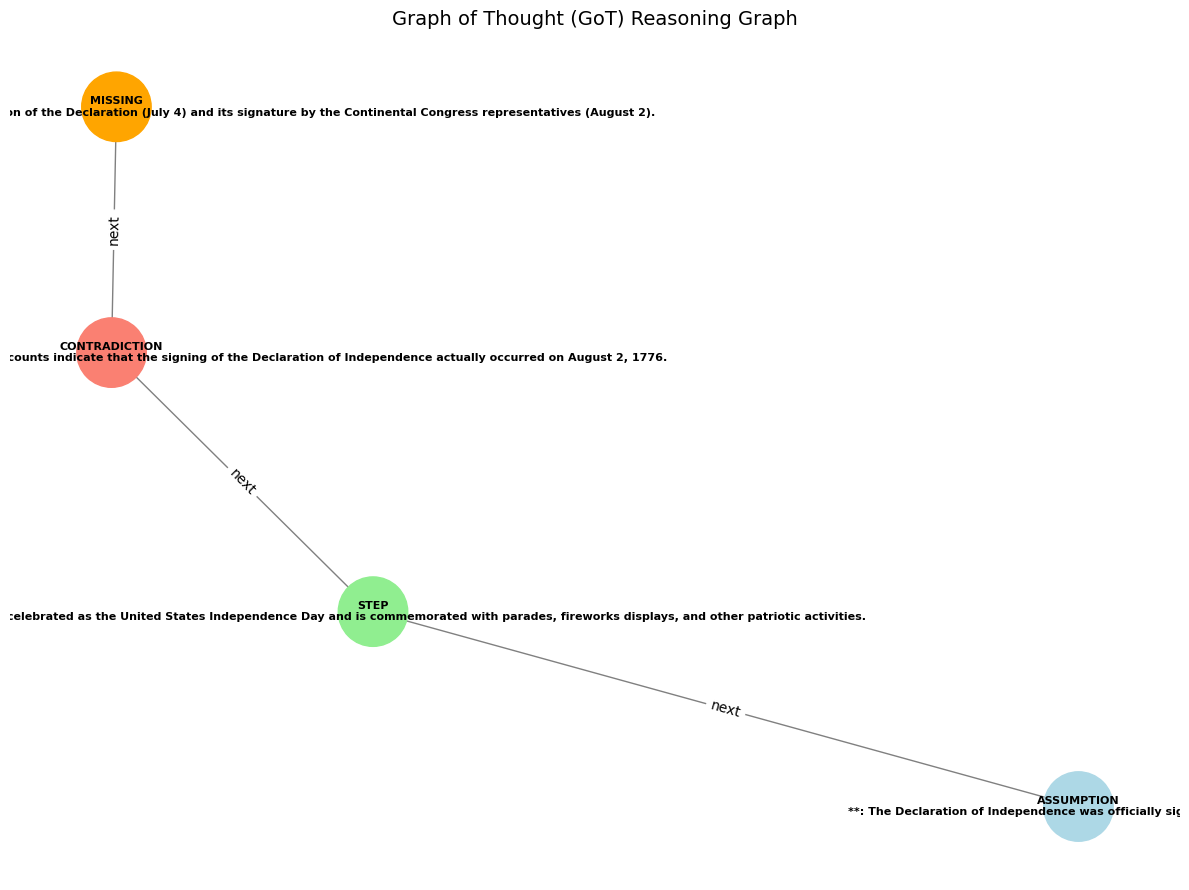

In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
 
# Load parsed data (first 5 samples)
with open('ollama_parsed.json', 'r') as f:
    data = json.load(f)
 
def generate_got_graph(parsed_data_sample):
    G = nx.DiGraph()
 
    # Add nodes
    for node in parsed_data_sample['nodes']:
        G.add_node(
            node['id'],
            label=node['content'],
            type=node['type']
        )
 
    # Add edges with relation-aware styling
    for edge in parsed_data_sample['edges']:
        relation = edge.get("relation", "unspecified")
        G.add_edge(edge['from'], edge['to'], relation=relation)
 
    # Graph layout
    pos = nx.spring_layout(G, seed=42)
 
    # Node styling by type
    color_map = {
        "assumption": "lightblue",
        "step": "lightgreen",
        "contradiction": "salmon",
        "missing": "orange",
        "conclusion": "plum"
    }
    node_colors = [color_map.get(G.nodes[n]['type'], 'gray') for n in G.nodes()]
 
    # Draw nodes and labels
    plt.figure(figsize=(12, 9))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2500)
    nx.draw_networkx_labels(
        G, pos,
        labels={n: f"{G.nodes[n]['type'].upper()}\n{G.nodes[n]['label']}" for n in G.nodes()},
        font_size=8, font_weight='bold'
    )
 
    # Draw edges with relation-specific styles
    edge_colors = []
    edge_styles = []
    for u, v, data in G.edges(data=True):
        relation = data.get('relation', 'next')
        if relation == "contradicts":
            edge_colors.append("red")
            edge_styles.append("dashed")
        elif relation == "supports":
            edge_colors.append("green")
            edge_styles.append("solid")
        elif relation == "elaborates":
            edge_colors.append("blue")
            edge_styles.append("dotted")
        else:
            edge_colors.append("gray")
            edge_styles.append("solid")
 
    # Custom drawing for styled edges
    for style in set(edge_styles):
        styled_edges = [(u, v) for u, v, d in G.edges(data=True) if edge_styles[list(G.edges).index((u, v))] == style]
        nx.draw_networkx_edges(
            G, pos,
            edgelist=styled_edges,
            style=style,
            edge_color=[edge_colors[list(G.edges).index((u, v))] for u, v in styled_edges]
        )
 
    # Draw edge labels (relation types)
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(u, v): G.edges[u, v]['relation'] for u, v in G.edges()}
    )
 
    plt.title("Graph of Thought (GoT) Reasoning Graph", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
 
# Generate GoT graphs for first 5 samples
for sample in data[:5]:
    generate_got_graph(sample['parsed'])